## Tarea 12 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 8 de diciembre
* Cuaderno ajustado del trabajo de Guillaume Lemaltre, Andreas Mueller.

El clustering es la tarea de reunir muestras en grupos de muestras similares según una medida de similitud o distancia (disimilitud) predefinida, como la distancia euclidiana.

![](clustering.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Creamos un conjunto de datos 2-d artificiales

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

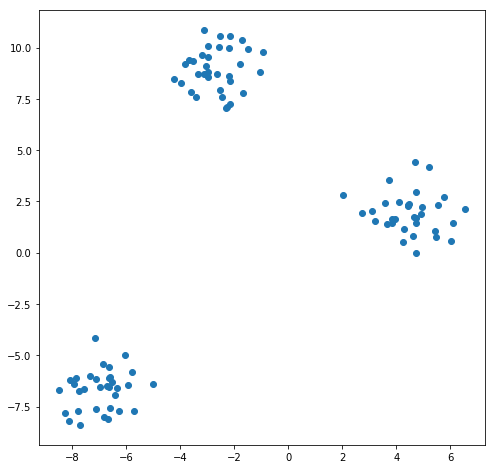

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])

En el diagrama de dispersión anterior, podemos ver tres grupos separados de puntos de datos y nos gustaría recuperarlos mediante clustering. Piensa en descubrir las etiquetas de clase que ya damos por sentado en una tarea de clasificación.

Incluso si los grupos son obvios en los datos, es difícil encontrarlos cuando los datos viven en un espacio de alta dimensión, que no podemos visualizar en un solo histograma o diagrama de dispersión.

Usaremos uno de los algoritmos de clustering más simples, `K-means`. Este es un algoritmo iterativo que busca tres centros de clustering, de modo que la distancia de cada punto a su cluster se minimice. La implementación estándar de K-means utiliza la distancia euclidiana, por lo que queremos asegurarnos de que todas nuestras variables se midan en la misma escala si estamos trabajando con datos de datos del mundo real. 

1. ¿Cómo esperas que se vea la salida?

In [4]:
# Tu respuesta

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

Podemos obtener las etiquetas de clúster ya sea llamando a `fit` y luego accediendo al atributo `labels_` del estimador de `K-means`, o llamando a `fit_predict`. De cualquier manera, el resultado contiene la ID del clúster al que se asigna cada punto.

In [6]:
etiquetas = kmeans.fit_predict(X)

In [7]:
etiquetas

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [8]:
np.all(y == etiquetas)

False

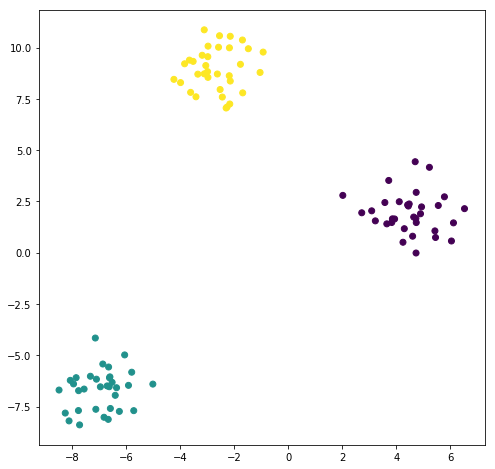

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas)

Comparamos las etiquetas verdaderas.

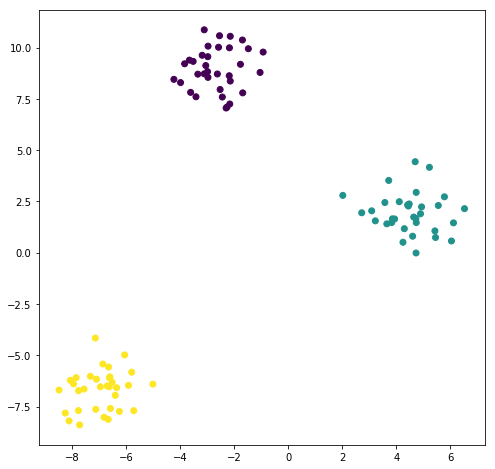

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)

Aquí, probablemente estamos satisfechos con los resultados del clustering. Pero en general podríamos querer tener una evaluación más cuantitativa. ¿Qué tal si comparamos nuestras etiquetas de cluster con los datos que obtuvimos al generar los blobs?

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Puntuacion exactitud:', accuracy_score(y, etiquetas))
print(confusion_matrix(y, etiquetas))

Puntuacion exactitud: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [12]:
np.mean(y == etiquetas)

0.0

2 .Después de ver la matriz de etiquetas `True` y, y el diagrama de dispersión y las etiquetas anteriores, ¿puedes averiguar por qué nuestra exactitud computada es 0.0, no 1.0?, ¿puedes arreglarlo?

In [13]:
# Tu respuesta

Aunque recuperamos la partición de los datos en grupos de manera perfecta, las ID de grupo que asignamos fueron arbitrarias y no podemos esperar recuperarlos. Por lo tanto, debemos usar una métrica de puntuación diferente, como `ajusted_rand_score`, que es invariante a las permutaciones de las etiquetas:

In [14]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, etiquetas)

1.0

Una de las `desventajas` de los `K-means` es que tenemos que especificar el número de clusters, que a menudo no conocemos a priori. Por ejemplo, echemos un vistazo a lo que sucede si configuramos el número de clusters en 2 en nuestro conjunto de datos artificiales de 3 blobs:

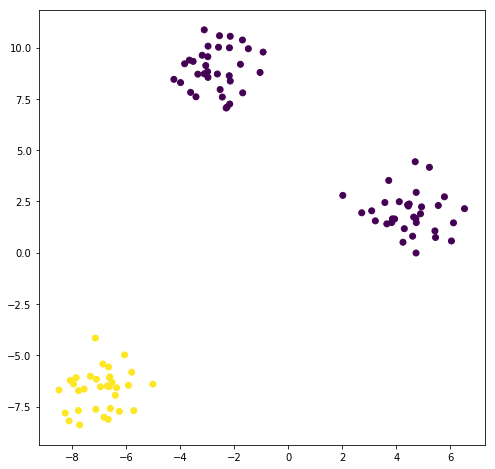

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
etiquetas = kmeans.fit_predict(X)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas)

In [16]:
kmeans.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

#### Método Elbow

El método Elbow es un enfoque de "regla de oro" para encontrar el número óptimo de clusters. Aquí, observamos la dispersión de clusters para diferentes valores de `k`:

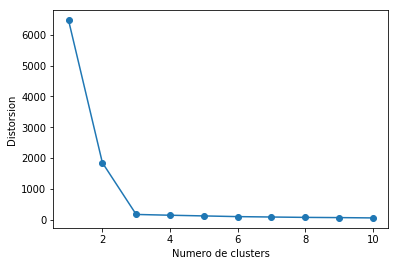

In [17]:
distorsiones = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distorsiones.append(km.inertia_)

plt.plot(range(1, 11), distorsiones, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsion')
plt.show()

Luego, seleccionamos el valor que se asemeja al `foso de un codo`. Como podemos ver, esto sería `k = 3` en este caso, lo que tiene sentido dada nuestra descripción visual del conjunto de datos anteriormente.

El clustering viene con supuestos:

* Un algoritmo de clustering  encuentra clústeres al hacer suposiciones con muestras que deben agruparse. Cada algoritmo hace suposiciones diferentes y la calidad e interpretabilidad de sus resultados dependerá de si las suposiciones se satisfacen para su objetivo. Para `K-means`, el modelo es que todos los clusters tienen una varianza esférica igual.

* En general, no hay garantía de que la estructura encontrada por un algoritmo de clustering tenga algo que ver con lo que nos interesa.

Podemos crear fácilmente un conjunto de datos que tenga clusterinf no isotrópicos, en los que fallarán los `kms`:


Text(0.5,1,'Blobs de tamaño desigual')

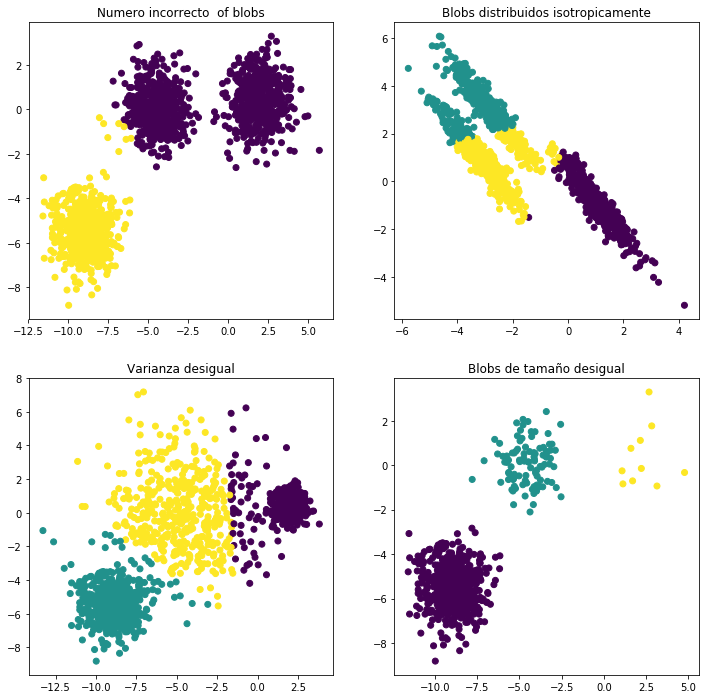

In [18]:
plt.figure(figsize=(12, 12))

n_muestras = 1500
random_state = 170
X, y = make_blobs(n_samples=n_muestras, random_state=random_state)

# Numero incorrecto de clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Numero incorrecto  of blobs")

# Datos distribuidos isotropicamente
transformacion = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformacion)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Blobs distribuidos isotropicamente")

# Diferencia de varianza
X_varied, y_varied = make_blobs(n_samples=n_muestras,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Varianza desigual")

# Blobs de tamaño desigual
X_filtrado= np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtrado)

plt.subplot(224)
plt.scatter(X_filtrado[:, 0], X_filtrado[:, 1], c=y_pred)
plt.title("Blobs de tamaño desigual")

### Rutinas de clustering

Los siguientes son dos algoritmos de agrupamiento conocidos.

 * sklearn.cluster.KMeans:
    El algoritmo de clustering más simple, pero efectivo. Necesita que se le proporcione el número de clusters por adelantado y se supone que los datos se normalizan como entrada (se usa un modelo de PCA como preprocesador).
    
 * sklearn.cluster.MeanShift:
    Puede encontrar clústeres con mejor aspecto que KMeans pero no es escalable a un gran número de muestras.
  
 * sklearn.cluster.DBSCAN:
    Puede detectar clusters de forma irregular en función de la densidad, es decir, es probable que las regiones dispersas en el espacio de entrada se conviertan en límites entre clusters. También puede detectar valores atípicos (muestras que no forman parte de un clúster).
    
 * sklearn.cluster.AffinityPropagation:
    Algoritmo de clustering basado en el paso de mensajes entre puntos de datos.
    
 * sklearn.cluster.SpectralClustering:
    `KMeans` aplicado a una proyección del grafo normalizado Laplaciano: encuentra cortes de grafos normalizados si la matriz de afinidad se interpreta como una matriz de adyacencia de un grafo.
    
 * sklearn.cluster.Ward:
    Ward implementa un agrupamiento jerárquico basado en el algoritmo Ward, un enfoque que minimiza la variación. En cada paso, minimiza la suma de las diferencias al cuadrado dentro de todos los clusters (`criterio de inercia`).

De estos, Ward, SpectralClustering, DBSCAN y la Affinity Propagation también pueden trabajar con matrices de similitud precomputadas.

![](cluster_comparacion.png)

3. Realiza un clustering `K-mean`  en los datos `digits`, buscando diez clústeres. Visualiza  los centros del clúster como imágenes (es decir, modifique cada uno de ellos en `8x8 `y use `plt.imshow`) ¿Los clústeres están correlacionados con particulares dígitos? ¿Qué es el `adjust_rand_score`?


In [19]:
# Tu solucion

4. Visualiza los dígitos proyectados usando las etiquetas del clusters como color. ¿Que notaste?

In [20]:
# Tu solucion